### Assignment 3 - Logistic Regression

In [1]:
# This code appears in every demonstration Notebook.
# By default, when you run each cell, only the last output of the codes will show.
# This code makes all outputs of a cell show.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In this assignment, we will build logistic regression models to detect accounting fraud using financial statement features. <br>
The data was collected by Bao et al. (2020) based on the detected material accounting misstatements disclosed in the SEC’s Accounting and Auditing Enforcement Releases (AAERs). <br>
The dataset covers all publicly listed U.S. firms over the period 1990– 2014. The variable name of the fraud label is "misstate" (1 denotes fraud, and 0 denotes non-fraud). <br>
We will use both raw financial data from the financial statements and the financial ratios that are used to evaluate the financial performance of a company for detection.<br>

You may find the description of variables in the Word document.

The description of the 28 raw accounting variables:\
act -- Current Assets, Total\
ap -- Account Payable, Trade\
at -- Assets, Total\
ceq - -Common/Ordinary Equity, Total\
che -- Cash and Short-Term Investments\
cogs -- Cost of Goods Sold\
csho -- Common Shares Outstanding\
dlc -- Debt in Current Liabilities, Total\
dltis -- Long-Term Debt Issuance\
dltt -- Long-Term Debt, Total\
dp -- Depreciation and Amortization\
ib -- Income Before Extraordinary Items\
invt -- Inventories, Total\
ivao -- Investment and Advances, Other\
ivst -- Short-Term Investments, Total\
lct -- Current Liabilities, Total\
lt -- Liabilities, Total\
ni -- Net Income (Loss)\
ppegt -- Property, Plant and Equipment, Total\
pstk -- Preferred/Preference Stock (Capital), Total\
re -- Retained Earnings\
rect -- Receivables, Total\
sale -- Sales/Turnover (Net)\
sstk -- Sale of Common and Preferred Stock\
txp -- Income Taxes Payable\
txt -- Income Taxes, Total\
xint -- Interest and Related Expense, Total\
prcc_f -- Price Close, Annual, Fiscal

The description of the 14 financial ratio variables:\
dch_wc -- WC accruals\
ch_rsst -- RSST accruals\
dch_rec -- Change in receivables\
dch_inv -- Change in inventory\
soft_assset -- % Soft assets\
dpi -- Depreciation index\
ch_cs -- Change in cash sales\
ch_cm -- Change in cash margin\
ch_roa -- Change in return on assets\
ch_fcf -- Change in free cash flows\
reoa -- Retained earnings over total assets\
EBIT -- Earnings before interest and taxes over total assets\
issue -- Actual issuance\
bm -- Book-to-market

1. Import the libraries

In [2]:
import pandas as pd
import numpy
import statsmodels.api as sm
import sklearn.linear_model as lm

2. Read in the dataset and display basic information about the dataset.

In [3]:
# Loading in the dataset
accounting_df = pd.read_csv('Datasets/AccountingFraud.csv')

In [4]:
# Preview dataset and row/column count
print(accounting_df.shape)
accounting_df.head()

(146045, 44)


,fyear,misstate,act,ap,at,ceq,che,cogs,csho,dlc,...,soft_assets,ch_cs,ch_cm,ch_roa,issue,bm,dpi,reoa,EBIT,ch_fcf
0,1990,0,10.047,3.736,32.335,6.262,0.002,30.633,2.526,3.283,...,0.312448,0.095082,0.082631,-0.019761,1,0.413170,0.873555,0.167620,0.161961,-0.042140
1,1990,0,1.247,0.803,7.784,0.667,0.171,1.125,3.556,0.021,...,0.315904,0.188832,-0.211389,-0.117832,1,0.157887,0.745139,-0.428957,-0.157888,0.100228
2,1990,0,55.040,3.601,118.120,44.393,3.132,107.343,3.882,6.446,...,0.605342,0.097551,-0.105780,0.091206,1,2.231337,1.015131,0.394768,0.063681,0.066348
3,1990,0,24.684,3.948,34.591,7.751,0.411,31.214,4.755,8.791,...,0.793068,-0.005725,-0.249704,0.017545,1,1.043582,1.026261,0.094822,0.088347,-0.017358
4,1990,0,17.325,3.520,27.542,-12.142,1.017,32.662,6.735,32.206,...,0.869182,-0.231536,-1.674893,-0.466667,0,-1.602508,0.598443,-0.942379,-0.700821,0.130349


In [5]:
# Dtypes and row counts
accounting_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146045 entries, 0 to 146044
Data columns (total 44 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   fyear        146045 non-null  int64  
 1   misstate     146045 non-null  int64  
 2   act          146045 non-null  float64
 3   ap           146045 non-null  float64
 4   at           146045 non-null  float64
 5   ceq          146045 non-null  float64
 6   che          146045 non-null  float64
 7   cogs         146045 non-null  float64
 8   csho         146045 non-null  float64
 9   dlc          146045 non-null  float64
 10  dltis        146045 non-null  float64
 11  dltt         146045 non-null  float64
 12  dp           146045 non-null  float64
 13  ib           146045 non-null  float64
 14  invt         146045 non-null  float64
 15  ivao         146045 non-null  float64
 16  ivst         146045 non-null  float64
 17  lct          146045 non-null  float64
 18  lt           146045 non-

In [6]:
# Explore nulls
accounting_df.isnull().sum()

fyear              0
misstate           0
act                0
ap                 0
at                 0
ceq                0
che                0
cogs               0
csho               0
dlc                0
dltis              0
dltt               0
dp                 0
ib                 0
invt               0
ivao               0
ivst               0
lct                0
lt                 0
ni                 0
ppegt              0
pstk               0
re                 0
rect               0
sale               0
sstk               0
txp                0
txt                0
xint               0
prcc_f             0
dch_wc          4759
ch_rsst         4851
dch_rec         4743
dch_inv         4615
soft_assets      592
ch_cs          15918
ch_cm          17107
ch_roa         12678
issue              0
bm                18
dpi             9228
reoa             591
EBIT             591
ch_fcf          5407
dtype: int64

Looks like only some financial ratios are missing values. This could be because financial ratios are not explicitly required to be reported in a financial report/audit, leading to them not being included for some rows. However, all 28 accounting variables are all non-null and numeric.

3. Explore the variable 'misstate' with a graph. What do you observe?

In [11]:
accounting_df['misstate'].value_counts()

misstate
0    145081
1       964
Name: count, dtype: int64

<Axes: xlabel='misstate'>

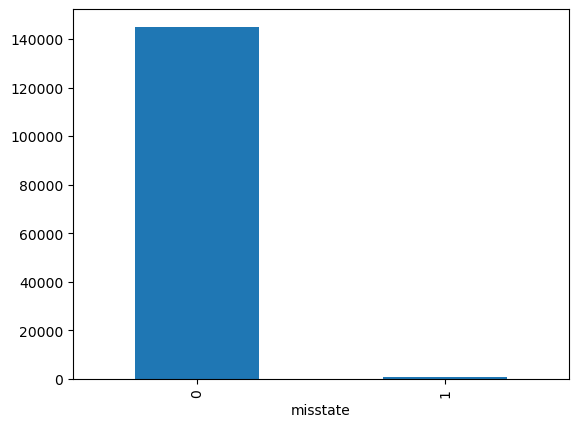

In [ ]:
# Exploring frequency
accounting_df['misstate'].value_counts().plot(kind= 'bar')

<Axes: xlabel='at', ylabel='dltt'>

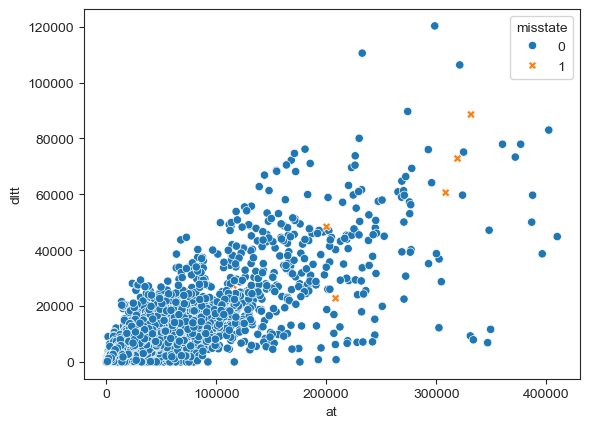

In [15]:
# Comparing against total assets and long term debt to see if companies in debt are more likely to be fraudulent
import seaborn as sns
sns.scatterplot(data = accounting_df, x = accounting_df['at'], y = accounting_df['dltt'],
                style = accounting_df['misstate'], hue = accounting_df['misstate'])

4. Next we sum the number of fraud cases by year and make a line graph.<br>
First we need to use .groupby() method to do the sum. We did not go over this in class. I explain here.
Then you can use the result to create a line graph.

In [9]:
Fraud.groupby('fyear')['misstate'].sum().reset_index()

# Groupby method group the data observations by the given variable 'fyear'
# into groups.
# Then the sum() will sum the variable 'misstate'
# reset_index() is to transform the result into a dataframe

NameError: name 'Fraud' is not defined

Save the output of the code above and make a line graph based on it. What do you observe?

5. The percentage of fraud cases is really small. To have better prediction power, we intend to oversample the fraud cases to 10% of the sample. Please run the code below. Pay attention to how I name the datasets. Change them to adapt to your cases. <br>
You may notice that after oversampling, the number of fraud cases increased.

In [ ]:
# Separate into minority and majority
minority_class = Fraud[Fraud['misstate'] == 1]
majority_class = Fraud[Fraud['misstate'] == 0]

# Count minority and majority samples
minority_count = len(minority_class)
majority_count = len(majority_class)
print("Original class distribution:", Fraud['misstate'].value_counts())

###############################
# Desired ratio = 10% / 90%   #
###############################
# For a 10/90 ratio, 1:9 (minority : majority)
# If we have 'N' majority samples, we want M' = N/9 minority samples.

RATIO = 9  # 1 minority : 9 majority
majority_N = majority_count

# Calculate how many minority samples we need to achieve 10/90 ratio
minority_needed = int(np.ceil(majority_N / RATIO))

# If we already have enough minority samples, no oversampling needed
# Otherwise, sample (with replacement) from the minority to get the required count
if minority_needed <= minority_count:
    oversampled_minority = minority_class
else:
    # Randomly sample with replacement to reach minority_needed
    oversampled_minority = minority_class.sample(n=minority_needed, replace=True, random_state=0)

# Combine the new minority subset with the entire majority
Fraud_oversampled = pd.concat([oversampled_minority, majority_class])

# Shuffle the dataset
Fraud_oversampled = Fraud_oversampled.sample(frac=1, random_state=42).reset_index(drop=True)

# Check new class distribution
print("New class distribution:", Fraud_oversampled['misstate'].value_counts())

6. Missing values. You may notice that some variables have missing values. <br>
Ideally, we need to handle missing values carefully. We will explore that in the future if we have the chance.<br>
For now, we just simply drop the observations with missing values. Use dropna() to do that.

7. Now let's fit logistic regression models. First, we only use the 14 financial ratio variables as the independent variables. You may find the definitions of them in the Word document.

Prepare the data.

8. Fit the model using statsmodels. Show the results. Which variables are not significant?